# 1. Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:

%matplotlib inline

In [3]:
path = r'C:\Users\marig\OneDrive\Área de Trabalho\curso arbeitsamt\data immersion\achievement 6\data sources\final project\Data\Prepared Data'

In [4]:
food_df = pd.read_csv(os.path.join (path, 'food_safety_cdc_3.csv'), index_col = 0)

In [5]:
food_df.head()

,Year,Month,State,Primary Mode,Etiology,Setting,Illnesses,Hospitalizations,Deaths,IFSAC Category,Etiology_id,IFSAC_id
0,2011,1,Ohio,Food,Unknow,Restaurant - Sit-down dining,2,0.0,0.0,Multiple,0,0
1,2011,1,Ohio,Food,Norovirus Genogroup II,Restaurant - Sit-down dining,2,0.0,0.0,Unknow,1,1
2,2011,1,Virginia,Food,Norovirus,Restaurant - Sit-down dining,7,0.0,0.0,Unknow,2,1
3,2011,1,Texas,Food,Unknow,Unknow,2,0.0,0.0,Unknow,0,1
4,2011,1,Colorado,Food,Norovirus unknown,Grocery store,8,1.0,0.0,Fruits,3,2


# 2. Data Cleaning and Consistency Checks

In [6]:
food_df.shape

(8703, 12)

## 2.1 Missing values

In [7]:
food_df.isnull().sum()

Year                0
Month               0
State               0
Primary Mode        0
Etiology            0
Setting             0
Illnesses           0
Hospitalizations    0
Deaths              0
IFSAC Category      0
Etiology_id         0
IFSAC_id            0
dtype: int64

No missing data

## 2.2 Duplicates

In [8]:
dups = food_df.duplicated()

In [9]:
dups.shape

(8703,)

No duplicates found

## 2.3 Extreme Values Check

C:\Users\marig\AppData\Local\Temp\ipykernel_14440\1290941581.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(food_df['Hospitalizations'], bins=25)


<Axes: xlabel='Hospitalizations', ylabel='Density'>

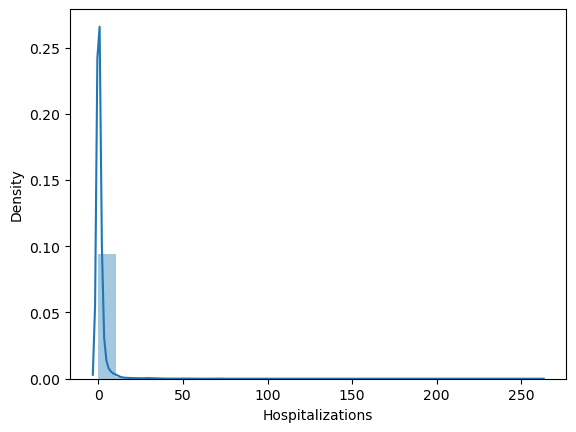

In [10]:
sns.distplot(food_df['Hospitalizations'], bins=25)

There are many outbreaks with 0 hospitalizations.

In [11]:
food_df['Hospitalizations'].mean() # Check the mean

1.2338274158336207

In [12]:
food_df['Hospitalizations'].median() #Check the median

0.0

In [13]:
food_df ['Hospitalizations'].max()

260.0

In [23]:
food_df ['Hospitalizations'].describe ()

count    8703.000000
mean        1.233827
std         6.750241
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       260.000000
Name: Hospitalizations, dtype: float64

There are some outliers over 5 hospitalizations, but I don't want to remove them because it is known that there are pathogens that cause huge outbreaks with several number of hospitalizations and deaths.

## 3. Visual exploration

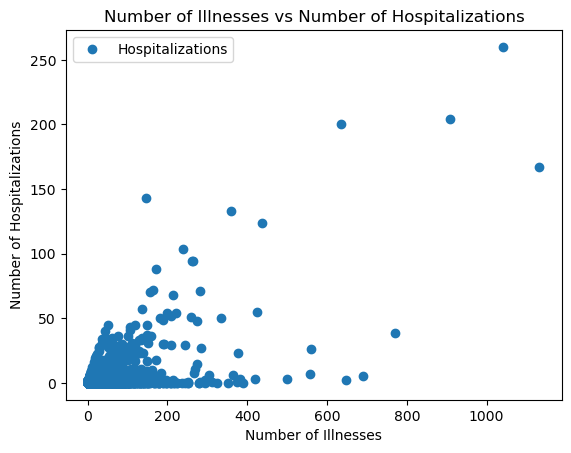

In [17]:
# Plotting a Scatterplot to see how the variables play against each other

food_df_plot = food_df.plot(x = 'Illnesses', y='Hospitalizations',style='o') 
plt.title('Number of Illnesses vs Number of Hospitalizations')  
plt.xlabel('Number of Illnesses')  
plt.ylabel('Number of Hospitalizations')  
plt.show()

In [18]:
# Export
food_df_plot.savefig (os.path.join (path, 'food_df_correlation.png'))

AttributeError: 'Axes' object has no attribute 'savefig'

It is easy to see the outliers on the scatterplot. But as I said before, because of the nature of the outbreaks, I would prefer not to take them out.

Hypothesis
"The higher the number of Illnesses, the higher the number of Hospitalizations"

Using the number of Illnesses to predict the number of Hospitalizations. 

Independant variable: Illnesses (X)

Dependant variable: Hospitalizations (y)

In [28]:
# Reshaping the variables into NumPy arrays and put them into separate objects.

X = food_df['Illnesses'].values.reshape(-1,1)
y = food_df['Hospitalizations'].values.reshape(-1,1)

In [29]:
X

array([[2],
       [2],
       [7],
       ...,
       [2],
       [7],
       [4]], dtype=int64)

In [30]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [7.],
       [0.]])

In [31]:
# Spliting the data in training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression analysis

In [32]:
# Regression object
regression = LinearRegression()

In [33]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

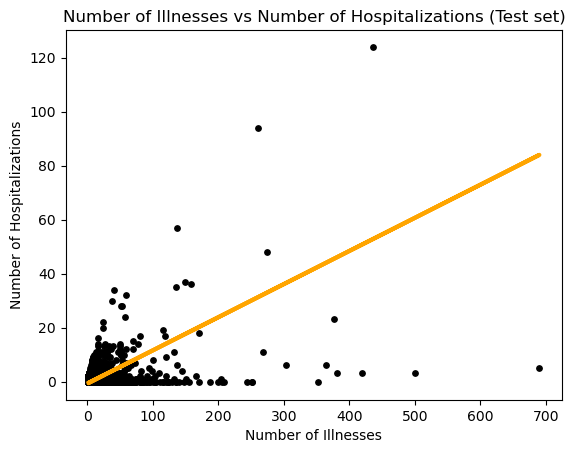

In [35]:
# Plot showing the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='black', s = 15)
plot_test.plot(X_test, y_predicted, color='orange', linewidth =3)
plot_test.title('Number of Illnesses vs Number of Hospitalizations (Test set)')
plot_test.xlabel('Number of Illnesses')
plot_test.ylabel('Number of Hospitalizations')
plot_test.show()

Visually the model don't adjust very well. There are too much points far away from the line, and lots of points concentrated between 0 and 100 illnesses, and 0 and 20 hospitalizations.It is also possible to see that there are high illnesses values that don't correspond to high hospitalizations values. This contradicts my hyphotesis.

In [36]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted) 

In [37]:
# Evaluating the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.12283083]]
Mean squared error:  22.9184186010971
R2 score:  -0.207215290039789


In [38]:
y_predicted

array([[ 2.06467275],
       [-0.51477469],
       [ 0.22221029],
       ...,
       [ 0.09937946],
       [ 0.09937946],
       [-0.39194386]])

In [39]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.0,2.064673
1,0.0,-0.514775
2,0.0,0.222210
3,0.0,-0.391944
4,0.0,-0.514775
5,0.0,0.222210
6,1.0,-0.146282
7,0.0,4.644120
8,0.0,0.099379
9,2.0,-0.514775


After the results from the MSE (22.91) and R2 (-0,20) it is confimerd that the model does not fit well. The MSE value is quiet high because if we look to the mean, that was 1.23, the MSE value is almost 20 times higher. So, the points are in general far away from the line.
The R2 coeficient is also very small, only 0.20, only 20% of the values can explain the variance.
Using the predicted values is also possible to see that there are differences between the real values and the predicted ones, liken for example number 27, the real number should be 3, and the model gave is 50.

I think the problem here is because there are many outbreaks with sick people, even high numbers, but with much less hospitalizations, then, the values concentrate on 0, and this don't bring us to any results.
The outliers also can have an influence on the final results.
Despite this, the results are expected, because there are many food pathogens that, despite infecting many people, do not necessarily lead to serious illnesses with hospitalizations and deaths.